Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Decision Tree Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.95      0.90        20
           Y       0.99      0.98      0.99       170

    accuracy                           0.98       190
   macro avg       0.93      0.97      0.95       190
weighted avg       0.98      0.98      0.98       190

Decision Tree Confusion Matrix:
[[ 19   1]
 [  3 167]]


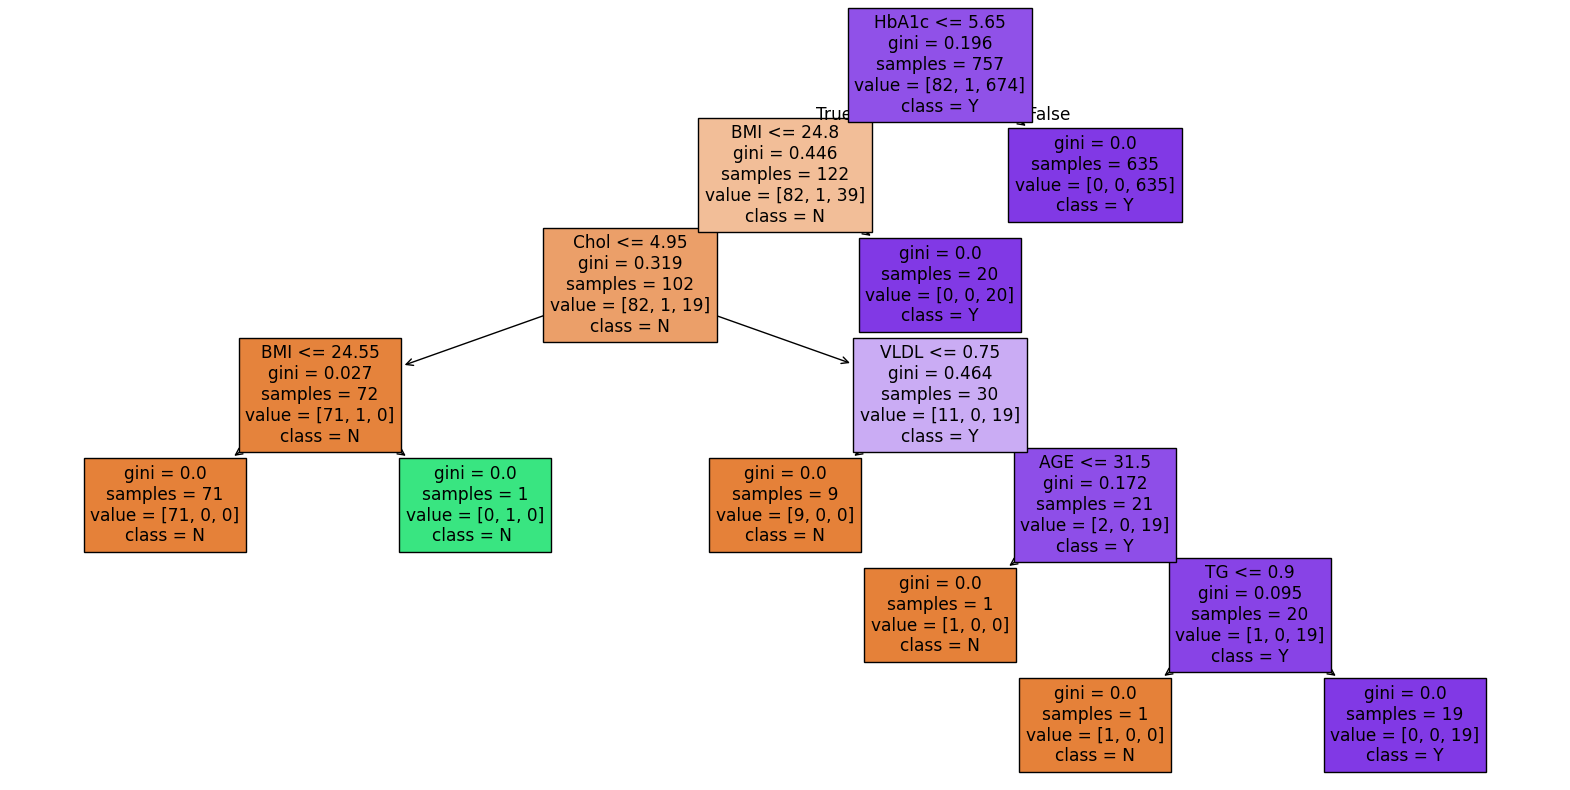

Decision Tree Model Accuracy: 0.9789473684210527
Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.90      0.90        20
           Y       0.99      0.99      0.99       170

    accuracy                           0.98       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.98      0.98      0.98       190

Random Forest Confusion Matrix:
[[ 18   2]
 [  2 168]]
Random Forest Model Accuracy: 0.9789473684210527

Top features related to diabetes according to Decision Tree:
HbA1c       0.632405
BMI         0.161149
Chol        0.112311
VLDL        0.069684
TG          0.012836
AGE         0.011614
Cr          0.000000
Urea        0.000000
LDL         0.000000
HDL         0.000000
Gender_F    0.000000
Gender_M    0.000000
dtype: float64

Top features related to diabetes according to Random Forest:
BMI         0.318566
HbA1c       0.266739
AGE         0.109994
Chol        0.100696
TG      

In [ ]:
# Include glycated hemoglobin, exclude classification predicted as diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
file_path = '/content/drive/MyDrive/Dataset of Diabetes-V2.csv'
data = pd.read_csv(file_path)

# Remove the ID column
data = data.drop('ID', axis=1)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender'])

# Split features and target variables
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Output the classification report and confusion matrix for the Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

# Output the accuracy
print(f"Decision Tree Model Accuracy: {dt_accuracy}")

# Output the classification report and confusion matrix for the Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Output the accuracy
print(f"Random Forest Model Accuracy: {rf_accuracy}")

# Calculate feature importances for the Decision Tree
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
dt_feature_importances = dt_feature_importances.sort_values(ascending=False)

# Print the medical indicators more strongly correlated with diabetes (Decision Tree)
print("\nTop features related to diabetes according to Decision Tree:")
print(dt_feature_importances)

# Calculate feature importances for the Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)

# Print the medical indicators more strongly correlated with diabetes (Random Forest)
print("\nTop features related to diabetes according to Random Forest:")
print(rf_feature_importances)

Mounted at /content/drive
Decision Tree Classification Report (with 'p' class):
              precision    recall  f1-score   support

           N       0.95      0.90      0.93        21
           P       0.86      1.00      0.92         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.96      0.95       200
weighted avg       0.98      0.98      0.98       200

Decision Tree Confusion Matrix (with 'p' class):
[[ 19   0   2]
 [  0   6   0]
 [  1   1 171]]


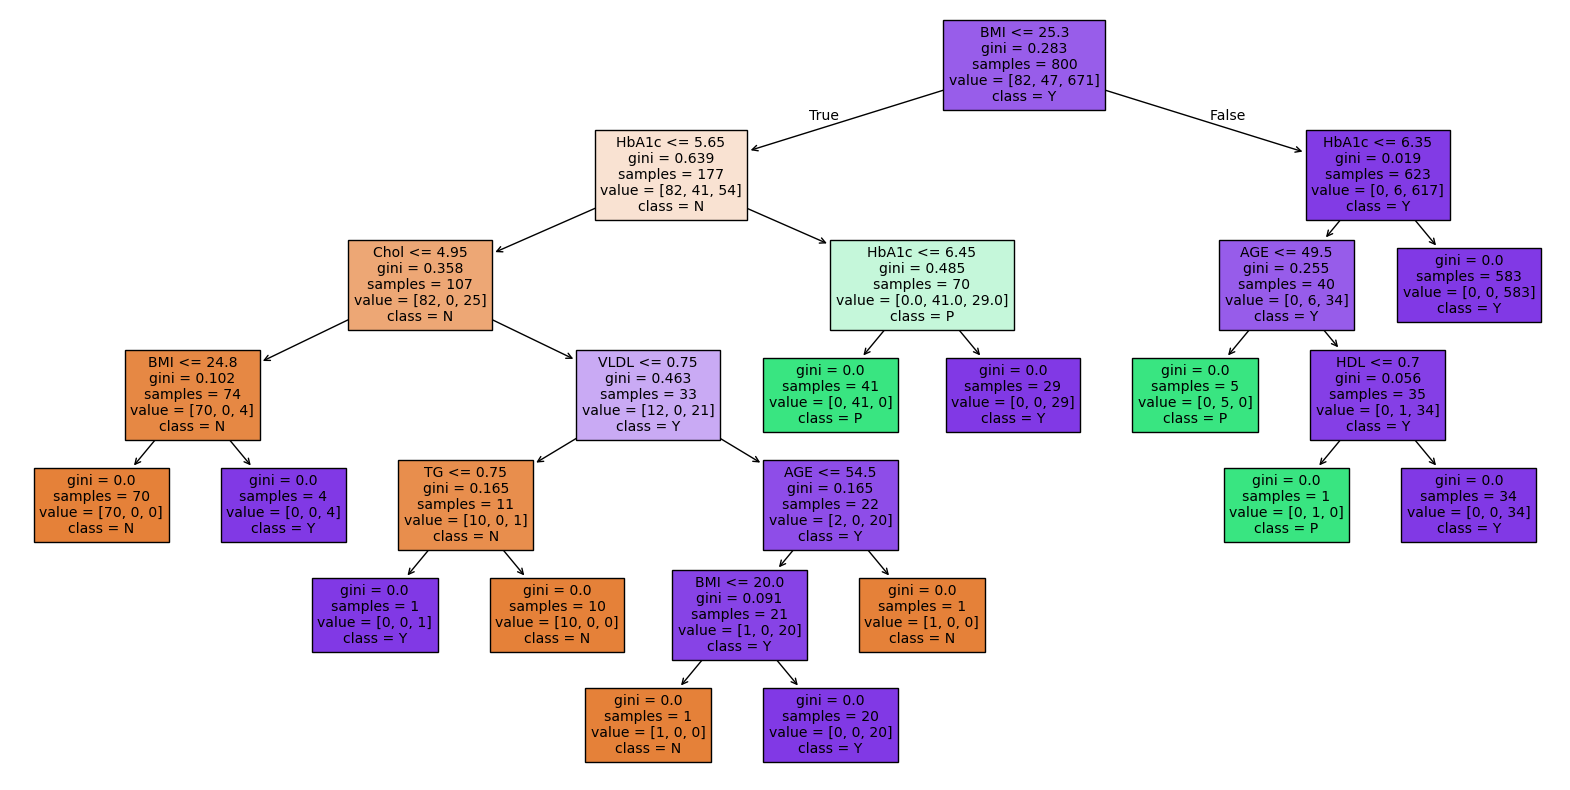

Decision Tree Model Accuracy: 0.98
Random Forest Classification Report (with 'p' class):
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

Random Forest Confusion Matrix (with 'p' class):
[[ 20   0   1]
 [  0   6   0]
 [  1   0 172]]
Random Forest Model Accuracy: 0.99

Top features related to diabetes according to Decision Tree:
BMI          0.489225
HbA1c        0.338032
Chol         0.068474
AGE          0.044192
VLDL         0.043437
HDL          0.008595
TG           0.008044
Urea         0.000000
No_Pation    0.000000
Cr           0.000000
LDL          0.000000
Gender_F     0.000000
Gender_M     0.000000
Gender_f     0.000000
dtype: float64

Top features r

In [ ]:
# Include glycated hemoglobin, include classification predicted as diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
file_path = '/content/drive/MyDrive/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Remove the ID column
data = data.drop('ID', axis=1)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender'])

# Remove spaces from the values in the 'CLASS' column
data['CLASS'] = data['CLASS'].str.strip()

# Split features and target variables
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Output the classification report and confusion matrix for the Decision Tree
print("Decision Tree Classification Report (with 'p' class):")
print(classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix (with 'p' class):")
print(confusion_matrix(y_test, dt_predictions))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

# Output the accuracy
print(f"Decision Tree Model Accuracy: {dt_accuracy}")

# Output the classification report and confusion matrix for the Random Forest
print("Random Forest Classification Report (with 'p' class):")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix (with 'p' class):")
print(confusion_matrix(y_test, rf_predictions))

# Output the accuracy
print(f"Random Forest Model Accuracy: {rf_accuracy}")

# Calculate feature importances for the Decision Tree
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
dt_feature_importances = dt_feature_importances.sort_values(ascending=False)

# Print the medical indicators more strongly correlated with diabetes (Decision Tree)
print("\nTop features related to diabetes according to Decision Tree:")
print(dt_feature_importances)

# Calculate feature importances for the Random Forest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)

# Print the medical indicators more strongly correlated with diabetes (Random Forest)
print("\nTop features related to diabetes according to Random Forest:")
print(rf_feature_importances)    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
Gender  1.000000  0.032136  0.116071  0.151766  0.003129 -0.060116  0.050080   
AGE     0.032136  1.000000  0.104074  0.063636  0.348311  0.035583  0.151121   
Urea    0.116071  0.104074  1.000000  0.618131 -0.035406 -0.002575  0.043430   
Cr      0.151766  0.063636  0.618131  1.000000 -0.041327 -0.007199  0.058509   
HbA1c   0.003129  0.348311 -0.035406 -0.041327  1.000000  0.174767  0.219967   
Chol   -0.060116  0.035583 -0.002575 -0.007199  0.174767  1.000000  0.319991   
TG      0.050080  0.151121  0.043430  0.058509  0.219967  0.319991  1.000000   
HDL    -0.130380 -0.024598 -0.044967 -0.028099  0.023891  0.103406 -0.081834   
LDL     0.063521  0.023038 -0.010279  0.041527  0.006722  0.409994  0.016560   
VLDL    0.202722 -0.109751 -0.013755  0.009271  0.063217  0.073109  0.1

<ipython-input-4-ae6166d16c51>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Gender'] = selected_data['Gender'].map({'F': 0, 'M': 1})
<ipython-input-4-ae6166d16c51>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['CLASS'] = selected_data['CLASS'].map({'N': 0, 'Y': 1})


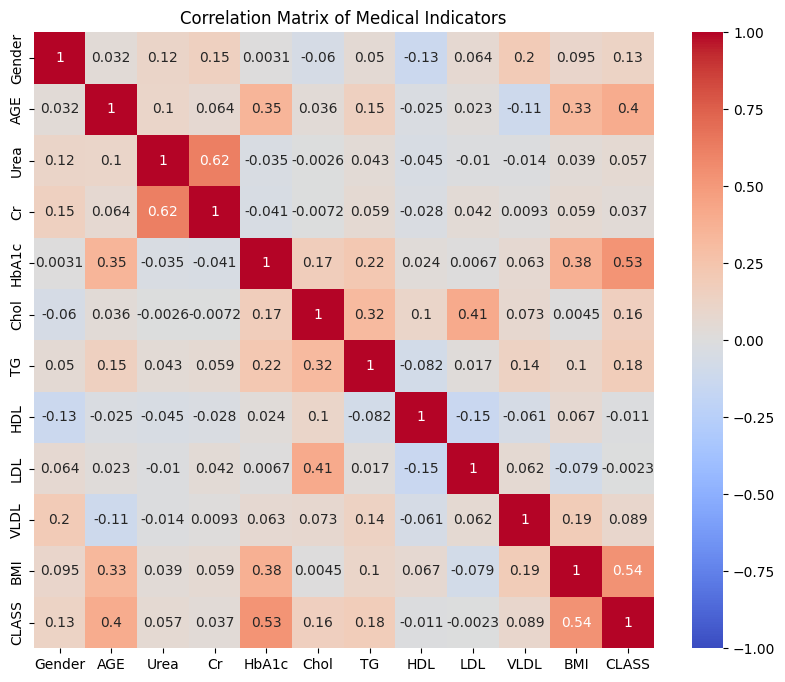

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the dataset
file_path = '/content/drive/MyDrive/Dataset of Diabetes-V2.csv'
data = pd.read_csv(file_path)

# Select columns for analysis
columns = ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']
selected_data = data[columns]

# Encode the gender column, convert F and M to numerical values
selected_data['Gender'] = selected_data['Gender'].map({'F': 0, 'M': 1})

# Encode the CLASS column, convert N and Y to numerical values
selected_data['CLASS'] = selected_data['CLASS'].map({'N': 0, 'Y': 1})

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Medical Indicators')
plt.show()    